<a href="https://colab.research.google.com/github/thomaslu678/gee-test/blob/main/clean/6_transect_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTE: Requires transect_points.csv (includes info about sample/LST how far from which transect)

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from datetime import timedelta
import scipy.stats as stats
import rasterio
from rasterio.transform import from_origin
from rasterio.features import rasterize
import geopandas as gpd
from shapely.geometry import Point
import requests

# TIFF Transects

In [2]:
transect_df = pd.read_csv('/content/sample_data/transect_points.csv')

In [4]:
transect_df['centered_dist'] = transect_df['distance_2'] - 330

In [6]:
transect_df['abs_dist'] = abs(transect_df['centered_dist'])

In [7]:
transect_df

,distance,id,distance_2,SAMPLE_1,centered_dist,abs_dist
0,0,1,0,NaN,-330,330
1,0,1,30,-0.042374,-300,300
2,0,1,60,NaN,-270,270
3,0,1,90,NaN,-240,240
4,0,1,120,NaN,-210,210
...,...,...,...,...,...,...
4336,5790,194,510,0.049668,180,180
4337,5790,194,540,NaN,210,210
4338,5790,194,570,-0.042429,240,240
4339,5790,194,600,0.036601,270,270


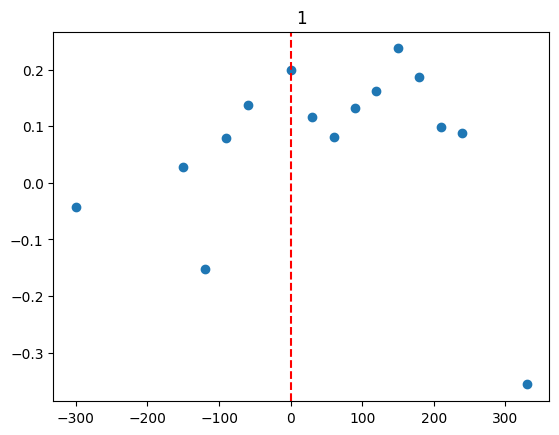

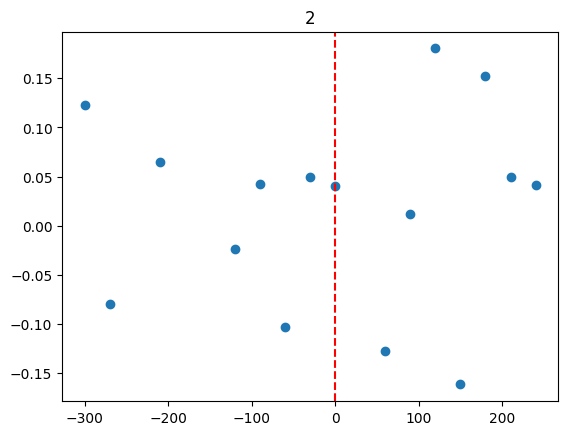

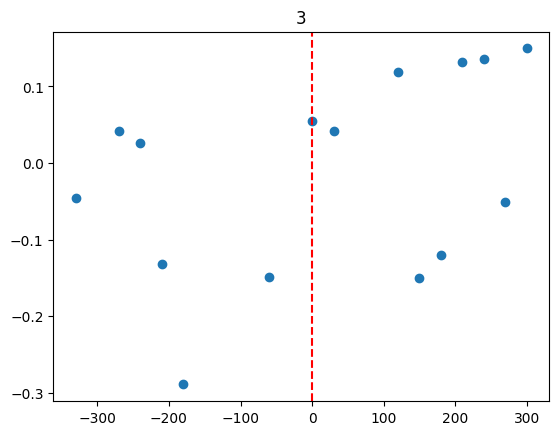

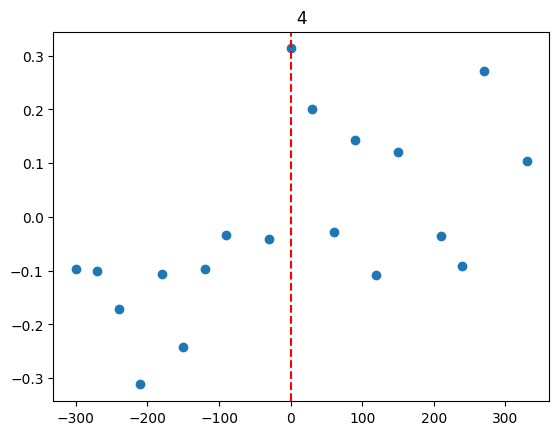

In [8]:
for i in range(1, 5):
  id_mask = transect_df['id'] == i
  plt.scatter(transect_df[id_mask]['centered_dist'], transect_df[id_mask]['SAMPLE_1'])
  plt.axvline(x=0, color='red', linestyle='--')
  plt.title(i)

  plt.show()

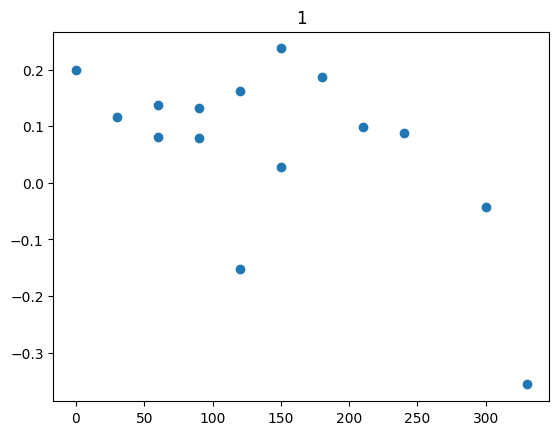

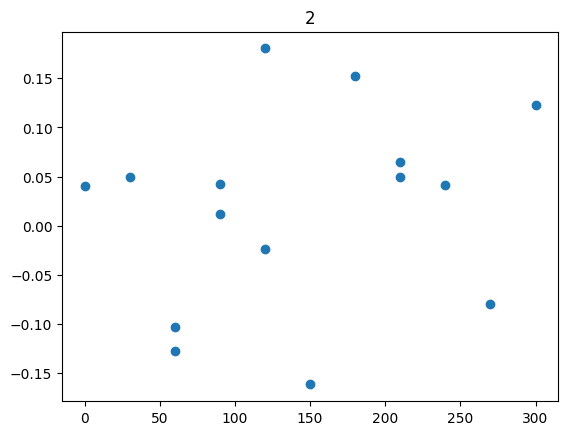

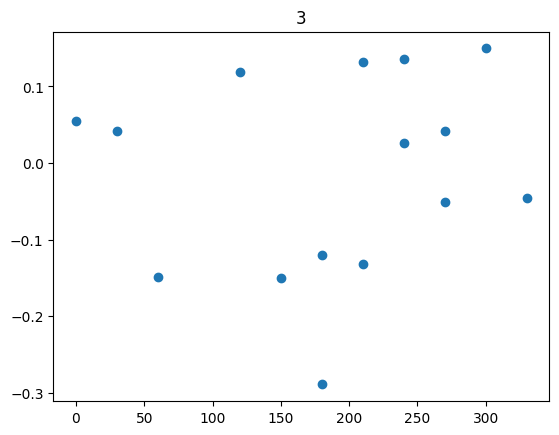

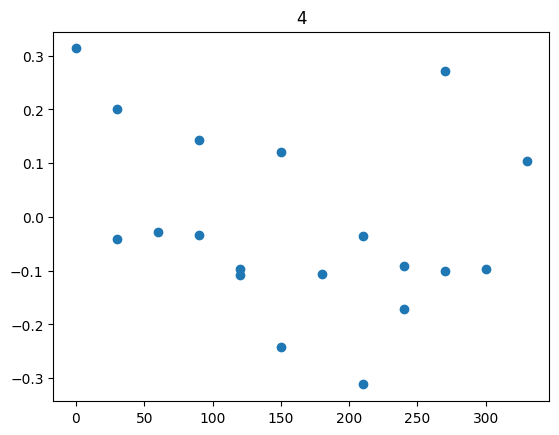

In [9]:
for i in range(1, 5):
  id_mask = transect_df['id'] == i
  plt.scatter(transect_df[id_mask]['abs_dist'], transect_df[id_mask]['SAMPLE_1'])
  # plt.axvline(x=0, color='red', linestyle='--')
  plt.title(i)
  plt.show()